#Hallar El Camino
##En este programa, se creara un grafo con un documento de excel, y se calculara el camino mas corto desde un camino a otro
##__instrucciones__
###Primero, se ingresa la hora, que es un entero de 1 a 24.
###Segundo, se introduce el trafico, que va de valores de 1 a 100.
##__Construccion__
###Del archivo de excel, se crea un grafo que es la conexion entre los nodos descritos en el archivo.
##__Calculo__
###luego, se ingresa el nodo de inicio, y se calcula la ruta mas corta.

#El programa calculara el camino mas corto desde un nodo inicial.

In [54]:
!pip install igraph
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [61]:

import pandas as pd
import igraph as ig
import matplotlib.pyplot as plt
from queue import PriorityQueue
tabla = pd.read_excel('lima_parte_escogida.xlsx')



##los caminos se leen desde un archivo xlsx (Microsoft excel) que contiene las adyacencias de los caminos
##y los pesos de esos caminos se leeen desde otro excel
##en este ejemplo se usaran dos excel de prueba.

#En este cuadro de texto, se encuentra el metodo es para calcular los pesos.

In [118]:
#aqui estan todas las funciones que se crearan para el proyecto.
def modificar_camino(distancia_f, hora_f, trafico_f, velocidad_f):
    if (hora_f >= 18):
      factor_hora = 1.65
    else:
      factor_hora = 1
    factor_a = factor_hora * trafico_f
    factor_b = factor_a / velocidad_f
    factor_final = distancia_f * factor_b
    return factor_final

In [62]:
adyacencia = tabla[['Item', 'ID_Origen_intereccion', 'ID_Final_Interseccion', 'distancia_Km', 'velocidad']]
print(adyacencia)

   Item  ID_Origen_intereccion  ID_Final_Interseccion  distancia_Km  velocidad
0     1                      1                      6      0.038973         70
1     2                      6                      5      0.004040         70
2     3                      5                      4      0.018227         70
3     4                      4                      3      0.037674         70
4     5                      3                      7      0.010827         70
5     6                      7                      8      0.072327         70
6     7                      8                      2      0.022975         70
7     8                      2                      1      0.020991         70


#Este es el algoritmo que realiza toda la operacion
##Primero, anota la hora de 1 a 24 y luego el trafico de 1 a 100
##despues, escribe el nodo inicial y luego el nodo final

Ingrese la hora, solo de 1 - 24
18
Ingrese el trafico, de 1 - 100
75
Ingrese el nodo inicial
0
Ingrese el nodo destino
4
La distancia mas corta es:  0.07604083928571427


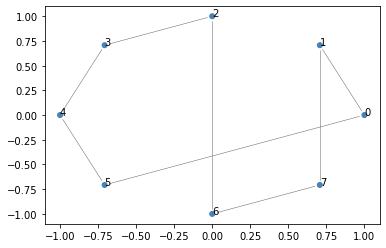

In [139]:
print("Ingrese la hora, solo de 1 - 24")
hora = input()
hora = int(hora)
print("Ingrese el trafico, de 1 - 100")
trafico = input()
trafico = int(trafico)

g = ig.Graph(8)
#añadiendo los pesos
for i in range(8):
  item_origen = adyacencia['ID_Origen_intereccion'][i]
  item_final = adyacencia['ID_Final_Interseccion'][i]
  item_distancia_Km = adyacencia['distancia_Km'][i]
  item_velocidad = adyacencia['velocidad'][i]

  nodo_origen, = adyacencia.loc[adyacencia['Item'] == item_origen].index
  nodo_final, = adyacencia.loc[adyacencia['Item'] == item_final].index
  peso = modificar_camino(item_distancia_Km, hora, trafico, item_velocidad)
  g.add_edge(nodo_origen, nodo_final)
  g.es[i]["Peso"]= peso

print("Ingrese el nodo inicial")
inicio = input()
inicio = int(inicio)

print("Ingrese el nodo destino")
destino = input()
destino = int(destino)
resultados = g.get_shortest_paths(
    inicio,
    to=destino,
    weights=g.es["Peso"],
    output="epath",
)

if len(resultados[0]) > 0:
    distancia = 0
    for e in resultados[0]:
        distancia += g.es[e]["Peso"]
    print("La distancia mas corta es: ", distancia)
else:
    print("No se pudo llegar al objetivo...")

g.es['width'] = 0.5
#g.es[resultados[0]]['width'] = 2.5


fig, ax = plt.subplots()
ig.plot(
    g,
    target=ax,
    layout='circle',
    vertex_color='steelblue',
    vertex_label=range(g.vcount()),
    edge_width=0.5,
    edge_label=g.es["Peso"],
    edge_color='#666',
    edge_align_label=True,
    edge_background='white',
)